### Table of Contents

1. Importing libraries and File
2. Treatment of Personally Identifiable Information (PII)
3. Creating Regional Segmentation
4. Developing an 'Active' list of customers
5. Creating Customer Profiles
6. Profile visualizations
    6a. Exploratory Analysis on Profiles
7. Aggregate Values on Price and Frequency
8. Exploratory Analysis on Profiles across Region & Department
9. Other Required Charts

### Step 1. Importing Libraries & Files

In [ ]:
import pandas as pd
import numpy as np
import os

In [ ]:
path = r"C:\Users\Azalia\Documents\Projects\Self-Study\CareerFoundry\Instacart Analysis"

In [ ]:
df_ord_prod_cust = pd.read_pickle(os.path.join(path,'02 Data', 'Prepared Data', 'ord_prod_cust2.pkl' ))

In [ ]:
df_ord_prod_cust.shape

In [ ]:
# quick cleanup
df_ord_prod_cust = df_ord_prod_cust.drop(columns=['_merge'])

In [ ]:
df_ord_prod_cust.describe()

In [ ]:
df_ord_prod_cust.info()

### Step 2 Identifying PII information

Identified PII columns: first_name, last_name. Propose to drop these columns.

In [ ]:
# drop PII columns
df_ord_prod_cust_PIIdel = df_ord_prod_cust.drop(columns = ['first_name','last_name'])

In [ ]:
df_ord_prod_cust_PIIdel.info()

### Step 3 Regional Segmentation

In [ ]:
# Creating new region column by flag
results = []

for value in df_ord_prod_cust_PIIdel['state']:
    if value in ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']:
        results.append('Northeast')
    elif value in ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']:
        results.append('Midwest')
    elif value in ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']:
        results.append('South')
    elif value in ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']:
        results.append('West')
    else:
        results.append('missing region')

In [ ]:
# creating a new column in df for region
df_ord_prod_cust_PIIdel['region'] = results

In [ ]:
df_ord_prod_cust_PIIdel.head()

In [ ]:
df_ord_prod_cust_PIIdel['region'].value_counts(dropna=False)

In [ ]:
# Changing datatype to 'category'
df_ord_prod_cust_PIIdel['region']=df_ord_prod_cust_PIIdel['region'].astype('category')

In [ ]:
df_ord_prod_cust_PIIdel.info()

In [ ]:
# checking spending habits using crosstabs
crosstab_spend = pd.crosstab(df_ord_prod_cust_PIIdel['region'],df_ord_prod_cust_PIIdel['spending_flag'])

In [ ]:
crosstab_spend

Overall, there are more low spenders than high spenders in all the region

### Step 4 Active flag

In [ ]:
# creating active flag using loc
df_ord_prod_cust_PIIdel.loc[df_ord_prod_cust_PIIdel['max_order']<5,'active_flag'] = 'not active'
df_ord_prod_cust_PIIdel.loc[df_ord_prod_cust_PIIdel['max_order']>=5,'active_flag'] = 'active'

In [ ]:
df_ord_prod_cust_PIIdel['active_flag'].value_counts(dropna = False)

In [ ]:
pd.set_option('display.max_columns',None)

In [ ]:
df_ord_prod_cust_PIIdel.head()

In [ ]:
#change category type
df_ord_prod_cust_PIIdel['active_flag']=df_ord_prod_cust_PIIdel['active_flag'].astype('category')

In [ ]:
df_ord_prod_cust_PIIdel_active = df_ord_prod_cust_PIIdel[df_ord_prod_cust_PIIdel['active_flag']== 'active']

In [ ]:
df_ord_prod_cust_PIIdel_active.shape

In [ ]:
df_ord_prod_cust_PIIdel_active.info()

In [ ]:
##### in comment mode to avoid saving multiple times during re-run
df_ord_prod_cust_PIIdel_active.to_pickle(os.path.join(path,'02 Data','Prepared Data','df_ord_prod_cust_active.pkl'))

### Step 5 Customer Profiles

In [ ]:
# Creating income profile 
results_income = []

for value in df_ord_prod_cust_PIIdel_active['income']:
    if value < 18000 :
        results_income.append('low income')
    elif (value >= 18000) and (value <150000):
        results_income.append('normal income')
    else:
        results_income.append('high income')

In [ ]:
df_ord_prod_cust_PIIdel_active['income_flag']=results_income

In [ ]:
df_ord_prod_cust_PIIdel_active['income_flag'].value_counts(dropna=False)

In [ ]:
# creating age profile flag using loc
df_ord_prod_cust_PIIdel_active.loc[df_ord_prod_cust_PIIdel_active['age']<30,'age_flag'] = 'young adult'
df_ord_prod_cust_PIIdel_active.loc[(df_ord_prod_cust_PIIdel_active['age']>=30) & (df_ord_prod_cust_PIIdel_active['age']<55) ,'age_flag'] = 'adult'
df_ord_prod_cust_PIIdel_active.loc[df_ord_prod_cust_PIIdel_active['age']>=55,'age_flag'] = 'senior'

In [ ]:
df_ord_prod_cust_PIIdel_active['age_flag'].value_counts(dropna=False)

In [ ]:
# Changing datatype to 'category'
df_ord_prod_cust_PIIdel_active['income_flag']=df_ord_prod_cust_PIIdel_active['income_flag'].astype('category')
df_ord_prod_cust_PIIdel_active['age_flag']=df_ord_prod_cust_PIIdel_active['age_flag'].astype('category')

### Step 6 Profile visualizations

#### Importing libraries

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

In [ ]:
# creating df with unique ids to view unique user profiles
df_unique = df_ord_prod_cust_PIIdel_active.drop_duplicates(subset = 'user_id' )

In [ ]:
# Distribution of age group
bar_agegrp = df_unique['age_flag'].value_counts().plot.bar(figsize=(8,10))

In [ ]:
# Export figure
bar_agegrp.figure.savefig(os.path.join(path,'04 Analysis','bar_agegrp.png'))

In [ ]:
# Distribution of income group
bar_incomegrp = df_unique['income_flag'].value_counts().plot.bar(figsize=(8,12))

In [ ]:
# Export figure
bar_incomegrp.figure.savefig(os.path.join(path,'04 Analysis','bar_incomegrp.png'))

In [ ]:
# Distribution of marital status group
bar_maritalstat = df_unique['marital_status'].value_counts().plot.bar(figsize=(8,13))

In [ ]:
# Export figure
bar_maritalstat.figure.savefig(os.path.join(path,'04 Analysis','bar_maritalstat2.png'))

In [ ]:
# create cross tab for age and marital status
crosstab_agemarital = pd.crosstab(df_unique['age_flag'], df_unique['marital_status'])
crosstab_agemarital

In [ ]:
#reorder rows & columns
crosstab_agemarital= crosstab_agemarital.reindex(['young adult', 'adult','senior'])
crosstab_agemarital= crosstab_agemarital.reindex(['living with parents and siblings','single', 'married','divorced/widowed'], axis='columns')
crosstab_agemarital

In [ ]:
# Distribution of age and marital
bar_agemarital = crosstab_agemarital.plot.bar(stacked=True, figsize=(10,8))

In [ ]:
# Export figure
bar_agemarital.figure.savefig(os.path.join(path,'04 Analysis','bar_agemarital.png'))

In [ ]:
# create cross tab for age and income group
crosstab_ageincome = pd.crosstab(df_unique['age_flag'], df_unique['income_flag'])
crosstab_ageincome

In [ ]:
#reorder rows & columns
crosstab_ageincome= crosstab_ageincome.reindex(['young adult', 'adult','senior'])
crosstab_ageincome= crosstab_ageincome.reindex(['normal income','high income'], axis='columns')
crosstab_ageincome

In [ ]:
# Distribution of age and income group
bar_ageincome = crosstab_ageincome.plot.bar(stacked=True, figsize=(10,8))

In [ ]:
# Export figure
bar_ageincome.figure.savefig(os.path.join(path,'04 Analysis','bar_ageincome.png'))

In [ ]:
# create cross tab for marital_status & income group
crosstab_maritalincome = pd.crosstab(df_unique['marital_status'], df_unique['income_flag'])
crosstab_maritalincome

In [ ]:
#reorder rows & columns
crosstab_maritalincome= crosstab_maritalincome.reindex(['living with parents and siblings','single', 'married','divorced/widowed'])
crosstab_maritalincome= crosstab_maritalincome.reindex(['normal income','high income'], axis='columns')
crosstab_maritalincome

In [ ]:
# Distribution of marital_status and income group
bar_maritalincome = crosstab_maritalincome.plot.bar(stacked=True, figsize=(10,13))

In [ ]:
# Export figure
bar_maritalincome.figure.savefig(os.path.join(path,'04 Analysis','bar_maritalincome.png'))

In [ ]:
# create cross tab for region and age
crosstab_regionage = pd.crosstab(df_unique['region'], df_unique['age_flag'])
crosstab_regionage

In [ ]:
#reorder rows & columns
crosstab_regionage= crosstab_regionage.reindex(['young adult', 'adult','senior'], axis='columns')
crosstab_regionage

In [ ]:
# Distribution of users across region
bar_regionage = crosstab_regionage.plot.bar(stacked=True, figsize=(10,13))

In [ ]:
# Export figure
bar_regionage.figure.savefig(os.path.join(path,'04 Analysis','bar_regionage.png'))

#### Step 6a Exploratory Analysis on Profiles

In [ ]:
# create cross tab for age group & order time of day
crosstab_ageorderhr = pd.crosstab(df_ord_prod_cust_PIIdel_active['order_hour_of_day'], df_unique['age_flag'])
crosstab_ageorderhr

In [ ]:
# reorder columns
crosstab_ageorderhr = crosstab_ageorderhr.reindex(['young adult', 'adult','senior'], axis='columns')

In [ ]:
# Distribution of age and order time of day
line_ageorderhr = sns.lineplot(data=crosstab_ageorderhr)

In [ ]:
# Export figure
line_ageorderhr.figure.savefig(os.path.join(path,'04 Analysis','line_ageorderhr.png'))

In [ ]:
# create cross tab for age group & day of week
crosstab_ageorderday = pd.crosstab(df_ord_prod_cust_PIIdel_active['order_day_of_week'], df_unique['age_flag'])
crosstab_ageorderday

In [ ]:
# reorder columns
crosstab_ageorderday = crosstab_ageorderday.reindex(['young adult', 'adult','senior'], axis='columns')

In [ ]:
# Distribution of age and order time of day
line_ageorderday = sns.lineplot(data=crosstab_ageorderday)

In [ ]:
# Export figure
line_ageorderday.figure.savefig(os.path.join(path,'04 Analysis','line_ageorderday.png'))

In [ ]:
# create crosstab for age_group & spending_flag
crosstab_agespend = pd.crosstab(df_ord_prod_cust_PIIdel_active['age_flag'], df_unique['spending_flag'])
crosstab_agespend

In [ ]:
# reorder columns
crosstab_agespend = crosstab_agespend.reindex(['young adult', 'adult','senior'])
crosstab_agespend = crosstab_agespend.reindex(['low spender', 'high spender'], axis='columns')

In [ ]:
# Distribution of age_group & spending_flag
bar_agespend = crosstab_agespend.plot.bar(stacked= True, figsize=(8,8),width = 0.8)

In [ ]:
# Export figure
bar_agespend.figure.savefig(os.path.join(path,'04 Analysis','bar_agespend.png'))

In [ ]:
# create crosstab for marital_status & spending_flag
crosstab_maritalspend = pd.crosstab(df_ord_prod_cust_PIIdel_active['marital_status'], df_unique['spending_flag'])
crosstab_maritalspend

In [ ]:
#reorder rows & columns
crosstab_maritalspend= crosstab_maritalspend.reindex(['living with parents and siblings','single', 'married','divorced/widowed'])
crosstab_maritalspend= crosstab_maritalspend.reindex(['low spender','high spender'], axis='columns')
crosstab_maritalspend

In [ ]:
# Distribution of marital status & spending_flag
bar_maritalspend = crosstab_maritalspend.plot.bar(stacked= True, figsize=(8,15),width = 0.6)

In [ ]:
# Export figure
bar_maritalspend.figure.savefig(os.path.join(path,'04 Analysis','bar_maritalspend.png'))

In [ ]:
# create crosstab for marital_status & order_of_week
crosstab_maritalorderday = pd.crosstab(df_ord_prod_cust_PIIdel_active['order_day_of_week'], df_unique['marital_status'])
crosstab_maritalorderday

In [ ]:
#reorder rows & columns
crosstab_maritalorderday= crosstab_maritalorderday.reindex(['living with parents and siblings','single', 'married','divorced/widowed'], axis='columns')
crosstab_maritalorderday

In [ ]:
# Distribution of age and order time of day
line_maritalorderday = sns.lineplot(data=crosstab_maritalorderday)

In [ ]:
# Export figure
line_maritalorderday.figure.savefig(os.path.join(path,'04 Analysis','line_maritalorderday.png'))

In [ ]:
# create crosstab for marital_status & frequency_flag
crosstab_maritalfreq = pd.crosstab(df_ord_prod_cust_PIIdel_active['marital_status'], df_unique['frequency_flag'])
crosstab_maritalfreq

In [ ]:
#reorder rows & columns
crosstab_maritalfreq= crosstab_maritalfreq.reindex(['living with parents and siblings','single', 'married','divorced/widowed'])
crosstab_maritalfreq= crosstab_maritalfreq.reindex(['non-frequent customer','regular customer','frequent customer'], axis='columns')
crosstab_maritalfreq

In [ ]:
crosstab_maritalfreq.to_clipboard()

In [ ]:
# Distribution of marital status & frequency_flag
bar_maritalfreq = crosstab_maritalfreq.plot.bar(stacked= True, figsize=(10,15),width = 0.6)

In [ ]:
# Export figure
bar_maritalfreq.figure.savefig(os.path.join(path,'04 Analysis','bar_maritalfreq.png'))

### Step 7 Aggregating profiles for frequency_flag and price

In [ ]:
df_ord_prod_cust_PIIdel_active.groupby(['age_flag']).agg({'prices':['mean' , 'max', 'min']})

In [ ]:
# fixing these values by turning it to nan using numpy
df_ord_prod_cust_PIIdel_active.loc[df_ord_prod_cust['prices']>100, 'prices'] = np.nan

In [ ]:
#aggregating age profile & prices
df_ord_prod_cust_PIIdel_active.groupby(['age_flag']).agg({'prices':['mean' , 'max', 'min']})

In [ ]:
#aggregating age profile & frequency
df_ord_prod_cust_PIIdel_active.groupby(['age_flag']).agg({'order_number':['mean' , 'max', 'min']})

In [ ]:
#aggregating marital profile & prices
df_ord_prod_cust_PIIdel_active.groupby(['marital_status']).agg({'prices':['mean' , 'max', 'min']})

In [ ]:
#aggregating marital profile & frequency
df_ord_prod_cust_PIIdel_active.groupby(['marital_status']).agg({'order_number':['mean' , 'max', 'min']})

In [ ]:
#aggregating income profile & prices
df_ord_prod_cust_PIIdel_active.groupby(['income_flag']).agg({'prices':['mean' , 'max', 'min']})

In [ ]:
#aggregating income profile & frequency
df_ord_prod_cust_PIIdel_active.groupby(['income_flag']).agg({'order_number':['mean' , 'max', 'min']})

### Step 8: Comparing customer profile with region and department

In [ ]:
#getting department data
df_dept = pd.read_csv(os.path.join(path,'02 Data', 'Prepared Data', 'departments_wrangled.csv' ))
df_dept

In [ ]:
#Turning df_dept into data dictionary
dept_zipped=zip(df_dept['department_id'], df_dept['department'])
dept_dict=dict(dept_zipped)
dept_dict

In [ ]:
#Mapping department names to department_id in dataframe
df_ord_prod_cust_PIIdel_active['department'] = df_ord_prod_cust_PIIdel_active['department_id'].map(dept_dict)
df_ord_prod_cust_PIIdel_active.head()

In [ ]:
# comparing age profile and department goods
crosstab_agedept = pd.crosstab(df_ord_prod_cust_PIIdel_active['department'],df_ord_prod_cust_PIIdel_active['age_flag'])
crosstab_agedept

In [ ]:
# reorder columns
crosstab_agedept = crosstab_agedept.reindex(['young adult', 'adult','senior'], axis='columns')

In [ ]:
# Distribution of age group and department_id
bar_agedept = crosstab_agedept.plot.bar(stacked=False,figsize=(12,10),width = 0.8)

Produce and dairy eggs are most popular among all age groups

In [ ]:
# Export figure
bar_agedept.figure.savefig(os.path.join(path,'04 Analysis','bar_agedept.png'))

In [ ]:
# comparing marital status profile and department goods
crosstab_maritaldept = pd.crosstab(df_ord_prod_cust_PIIdel_active['department'],df_ord_prod_cust_PIIdel_active['marital_status'])
crosstab_maritaldept

In [ ]:
# reorder columns
crosstab_maritaldept = crosstab_maritaldept.reindex(['living with parents and siblings','single', 'married','divorced/widowed'], axis='columns')

In [ ]:
# Distribution of age group and department_id
bar_maritaldept = crosstab_maritaldept.plot.bar(stacked=False, figsize=(16,10), width=0.8)

In [ ]:
# Export figure
bar_maritaldept.figure.savefig(os.path.join(path,'04 Analysis','bar_maritaldept.png'))

In [ ]:
# comparing region and department goods
crosstab_regionspend = pd.crosstab(df_ord_prod_cust_PIIdel_active['region'],df_ord_prod_cust_PIIdel_active['spending_flag'])
crosstab_regionspend

In [ ]:
# reorder columns
crosstab_regionspend = crosstab_regionspend.reindex(['low spender', 'high spender'], axis='columns')

In [ ]:
# Distribution of spending and region
bar_regionspend = crosstab_regionspend.plot.bar(stacked=True, width=0.8)

In [ ]:
# Export figure
bar_regionspend.figure.savefig(os.path.join(path,'04 Analysis','bar_regionspend.png'))

In [ ]:
# comparing region and order hod
crosstab_regionorderhr = pd.crosstab(df_ord_prod_cust_PIIdel_active['order_hour_of_day'],df_ord_prod_cust_PIIdel_active['region'])
crosstab_regionorderhr

In [ ]:
# Distribution of order of day and region
line_regionorderhr = sns.lineplot(data=crosstab_regionorderhr)

In [ ]:
# Export figure
line_regionorderhr.figure.savefig(os.path.join(path,'04 Analysis','line_regionorderhr.png'))

In [ ]:
# comparing region and order dow
crosstab_regionorderday = pd.crosstab(df_ord_prod_cust_PIIdel_active['order_day_of_week'],df_ord_prod_cust_PIIdel_active['region'])
crosstab_regionorderday

In [ ]:
# Distribution of dept and region
line_regionorderday = sns.lineplot(data=crosstab_regionorderday)


In [ ]:
# Export figure
line_regionorderday.figure.savefig(os.path.join(path,'04 Analysis','line_regionorderday.png'))

In [ ]:
# comparing dept and region
crosstab_regiondept = pd.crosstab(df_ord_prod_cust_PIIdel_active['department'],df_ord_prod_cust_PIIdel_active['region'])
crosstab_regiondept

In [ ]:
# Distribution of order of day and region
plt.figure(figsize=(25,7))
line_regiondept = sns.lineplot(data=crosstab_regiondept)


In [ ]:
# Export fig
line_regiondept.figure.savefig(os.path.join(path,'04 Analysis','line_regiondept.png'))

### Step 9 Other required charts

In [ ]:
# getting info on price ranges 
bar_pricerange = df_ord_prod_cust_PIIdel_active['price_range_loc'].value_counts().plot.bar(figsize = (8,6))
plt.xticks(rotation = 0)

In [ ]:
# Export fig
bar_pricerange.figure.savefig(os.path.join(path,'04 Analysis','bar_pricerange.png'))

In [ ]:
# creating chart for loyalty count
bar_loyalty = df_unique['loyalty_flag'].value_counts().plot.bar(figsize = (8,6))
plt.xticks(rotation = 0)
plt.show()

In [ ]:
# Export fig
bar_loyalty.figure.savefig(os.path.join(path,'04 Analysis','bar_loyalty.png'))

In [ ]:
# comparing loyalty and age group
crosstab_loyaltyage = pd.crosstab(df_unique['loyalty_flag'],df_unique['age_flag'])
crosstab_loyaltyage

In [ ]:
# #reorder rows & columns
crosstab_loyaltyage= crosstab_loyaltyage.reindex(['young adult', 'adult','senior'],axis='columns')
crosstab_loyaltyage= crosstab_loyaltyage.reindex(['new customer','regular customer', 'loyal customer'])

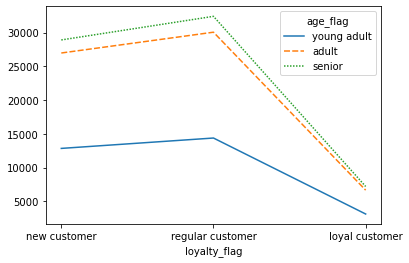

In [157]:
line_loyaltyage = sns.lineplot(data=crosstab_loyaltyage)

In [ ]:
# Export fig
line_loyaltyage.figure.savefig(os.path.join(path,'04 Analysis','line_loyaltyage.png'))

In [160]:
# comparing loyalty and marital status
crosstab_loyaltymarital = pd.crosstab(df_unique['loyalty_flag'],df_unique['marital_status'])
crosstab_loyaltymarital

marital_status,divorced/widowed,living with parents and siblings,married,single
loyalty_flag,,,,
loyal customer,1452,810,11940,2815
new customer,5781,3162,48332,11475
regular customer,6598,3636,54024,12606


In [161]:
# #reorder rows & columns
crosstab_loyaltymarital= crosstab_loyaltymarital.reindex(['living with parents and siblings','single', 'married','divorced/widowed'],axis='columns')
crosstab_loyaltymarital= crosstab_loyaltymarital.reindex(['new customer','regular customer', 'loyal customer'])

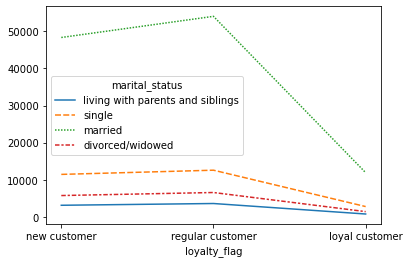

In [162]:
line_loyaltymarital = sns.lineplot(data=crosstab_loyaltymarital)

In [163]:
# Export fig
line_loyaltymarital.figure.savefig(os.path.join(path,'04 Analysis','line_loyaltymarital.png'))

In [ ]:
# comparing loyalty and spending_flag
crosstab_loyaltyspend = pd.crosstab(df_ord_prod_cust_PIIdel_active['loyalty_flag'],df_ord_prod_cust_PIIdel_active['spending_flag'])
crosstab_loyaltyspend

In [ ]:
#reorder rows & columns
crosstab_loyaltyspend= crosstab_loyaltyspend.reindex(['new customer','regular customer', 'loyal customer'])
crosstab_loyaltyspend= crosstab_loyaltyspend.reindex(['low spender','high spender'], axis='columns')
crosstab_loyaltyspend

In [ ]:
# creating chart for loyalty count
bar_loyaltyspend = crosstab_loyaltyspend.plot.bar(figsize = (8,6))
plt.xticks(rotation = 0)
plt.show()

In [ ]:
# Export fig
bar_loyaltyspend.figure.savefig(os.path.join(path,'04 Analysis','bar_loyaltyspend.png'))

In [ ]:
# comparing loyalty and order hour
crosstab_loyaltyorderhr = pd.crosstab(df_ord_prod_cust_PIIdel_active['order_hour_of_day'],df_ord_prod_cust_PIIdel_active['loyalty_flag'])
crosstab_loyaltyorderhr

In [ ]:
# reorder rows & columns
crosstab_loyaltyorderhr= crosstab_loyaltyorderhr.reindex(['new customer','regular customer', 'loyal customer'],axis='columns')

In [ ]:
line_loyaltyorderhr = sns.lineplot(data=crosstab_loyaltyorderhr)

In [ ]:
# Export fig
line_loyaltyorderhr.figure.savefig(os.path.join(path,'04 Analysis','line_loyaltyorderhr.png'))

In [ ]:
# comparing loyalty and order day
crosstab_loyaltyorderday = pd.crosstab(df_ord_prod_cust_PIIdel_active['order_day_of_week'],df_ord_prod_cust_PIIdel_active['loyalty_flag'])
crosstab_loyaltyorderday

In [ ]:
#reorder rows & columns
crosstab_loyaltyorderday= crosstab_loyaltyorderday.reindex(['new customer','regular customer', 'loyal customer'],axis='columns')

In [ ]:
line_loyaltyorderday = sns.lineplot(data=crosstab_loyaltyorderday)

In [ ]:
# Export fig
line_loyaltyorderday.figure.savefig(os.path.join(path,'04 Analysis','line_loyaltyorderday.png'))

In [ ]:
# comparing income and order frequency
crosstab_incomefreq = pd.crosstab(df_ord_prod_cust_PIIdel_active['income_flag'],df_ord_prod_cust_PIIdel_active['frequency_flag'])
crosstab_incomefreq

In [ ]:
#reorder rows & columns
crosstab_incomefreq= crosstab_incomefreq.reindex(['normal income','high income'])
crosstab_incomefreq= crosstab_incomefreq.reindex(['non-frequent customer','regular customer','frequent customer'], axis='columns')

In [ ]:
bar_incomefreq = crosstab_incomefreq.plot.bar()
plt.xticks(rotation = 0)
plt.show()

In [ ]:
# Export fig
bar_incomefreq.figure.savefig(os.path.join(path,'04 Analysis','bar_incomefreq.png'))

In [ ]:
# comparing income and spending habit
crosstab_incomespend = pd.crosstab(df_ord_prod_cust_PIIdel_active['income_flag'],df_ord_prod_cust_PIIdel_active['spending_flag'])
crosstab_incomespend

In [ ]:
#reorder rows & columns
crosstab_incomespend= crosstab_incomespend.reindex(['normal income','high income'])
crosstab_incomespend= crosstab_incomespend.reindex(['low spender','high spender'], axis='columns')

In [ ]:
bar_incomespend = crosstab_incomespend.plot.bar()
plt.xticks(rotation = 0)
plt.show()

In [ ]:
# Export fig
bar_incomespend.figure.savefig(os.path.join(path,'04 Analysis','bar_incomespend.png'))